In [3]:
import pandas as pd

data = pd.read_csv("artifacts/data_ingestion/train.csv")
#test_data = pd.read_csv("artifacts/data_ingestion/test.csv")

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
data.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [7]:
data.shape

(7613, 5)

In [8]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [10]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


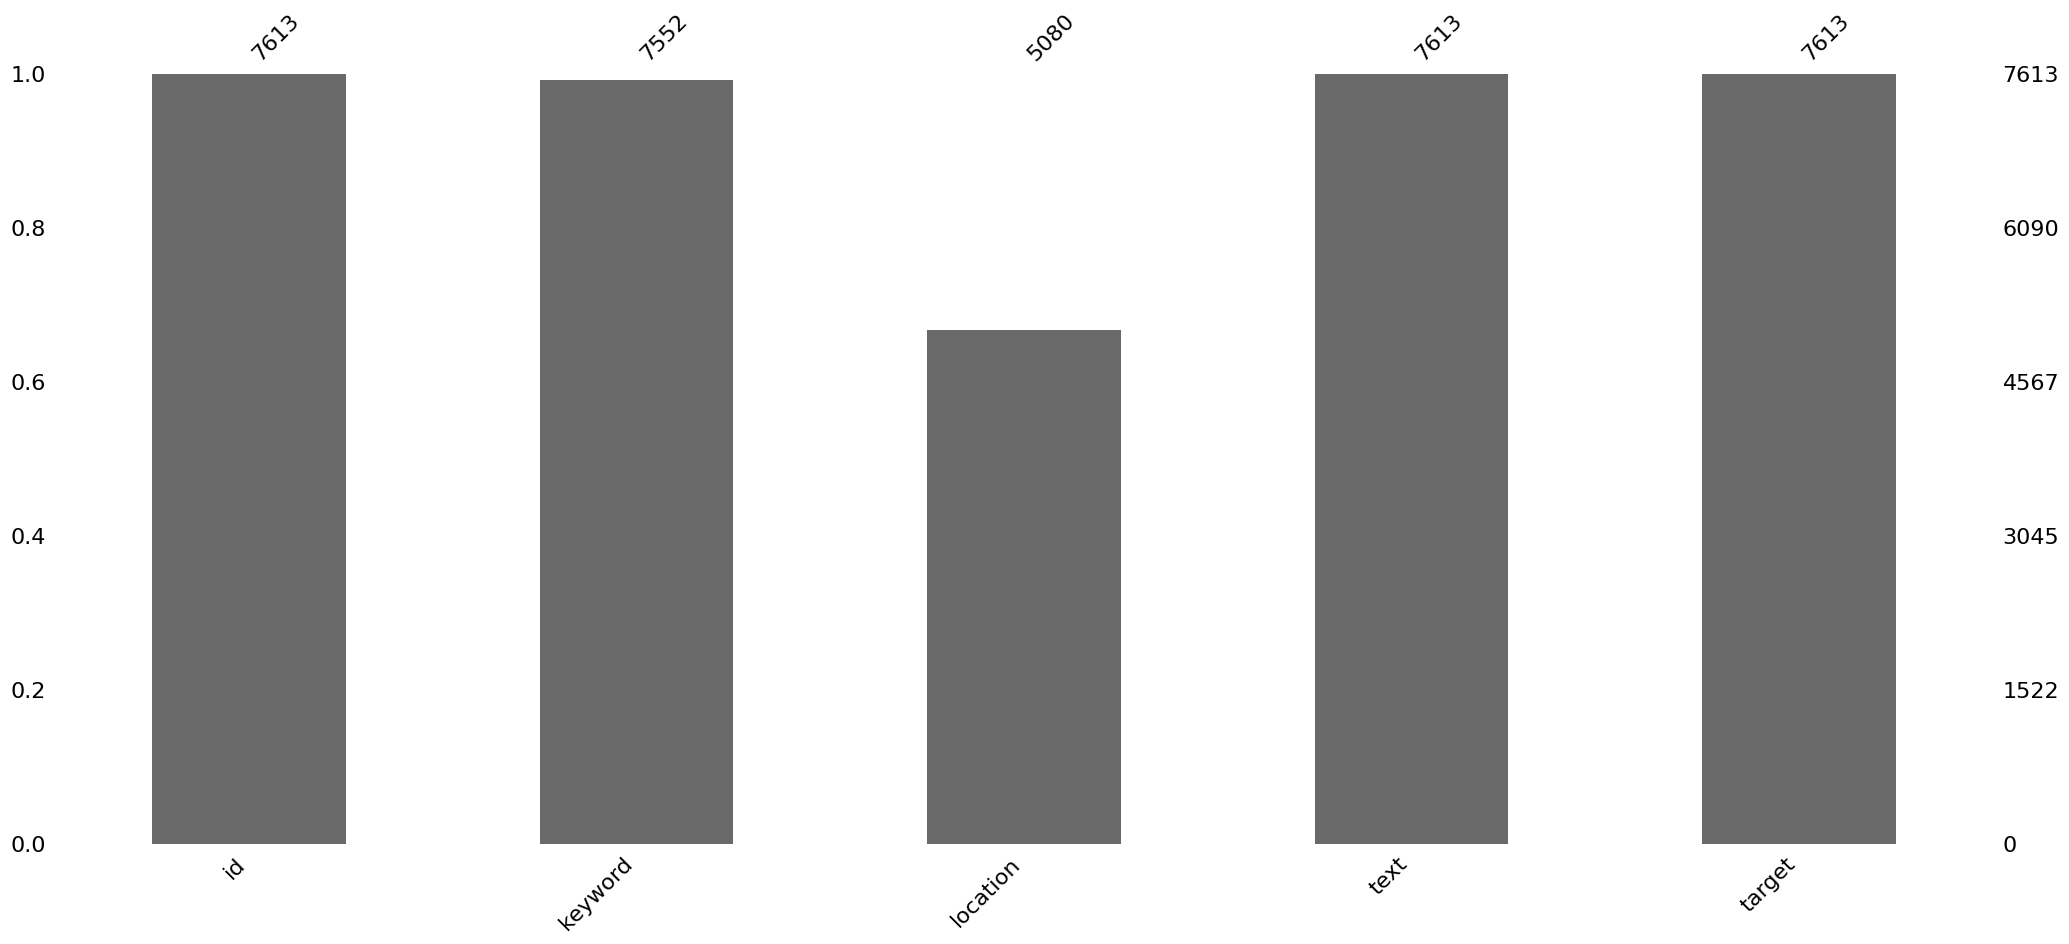

In [12]:
import yaml
import missingno as msno



# Load the YAML file
with open('../params.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)

# Access the variable
mcr = yaml_data['MIN_COMPLETION_RATE']
msno.bar(data,
         filter="top",  # select only features that have a completion rate >= p
         p=mcr# filter columns with % of missing values > min completion rate defined param
        );

In [20]:
from attr import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [21]:
from NLP_Disaster_Tweets.constants import *
from NLP_Disaster_Tweets.utils.common import read_yaml, create_directories, nullity_filter


In [22]:

class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    

    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [25]:
import pandas as pd


class DataValiadtion:
    def __init__(self, config: DataValidationConfig):
        self.config = config
        # Load the YAML file
        with open('../params.yaml', 'r') as yaml_file:
            yaml_data = yaml.safe_load(yaml_file)

        # Access the variable
        self.mcr = yaml_data['MIN_COMPLETION_RATE']


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            data=nullity_filter(data,'top',self.mcr)
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                        break
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
            
            return validation_status
        except Exception as e:
            raise e

In [24]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValiadtion(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\config\config.yaml
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\config\config.yaml
[2023-08-23 00:36:11,704: INFO: common: yaml file: c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\config\config.yaml loaded successfully]
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\params.yaml
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\params.yaml
[2023-08-23 00:36:11,707: INFO: common: yaml file: c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\params.yaml loaded successfully]
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\schema.yaml
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\schema.yaml
[2023-08-23 00:36:11,709: I